# Exam R
Mark Klik & Misja Mikkers

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [2]:
library(tidyverse)
library(gvlma)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 2.2.1     <U+221A> purrr   0.2.4
<U+221A> tibble  1.4.2     <U+221A> dplyr   0.7.4
<U+221A> tidyr   0.8.0     <U+221A> stringr 1.3.0
<U+221A> readr   1.1.1     <U+221A> forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Assignment 1


## Data

The data are given:


In [3]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

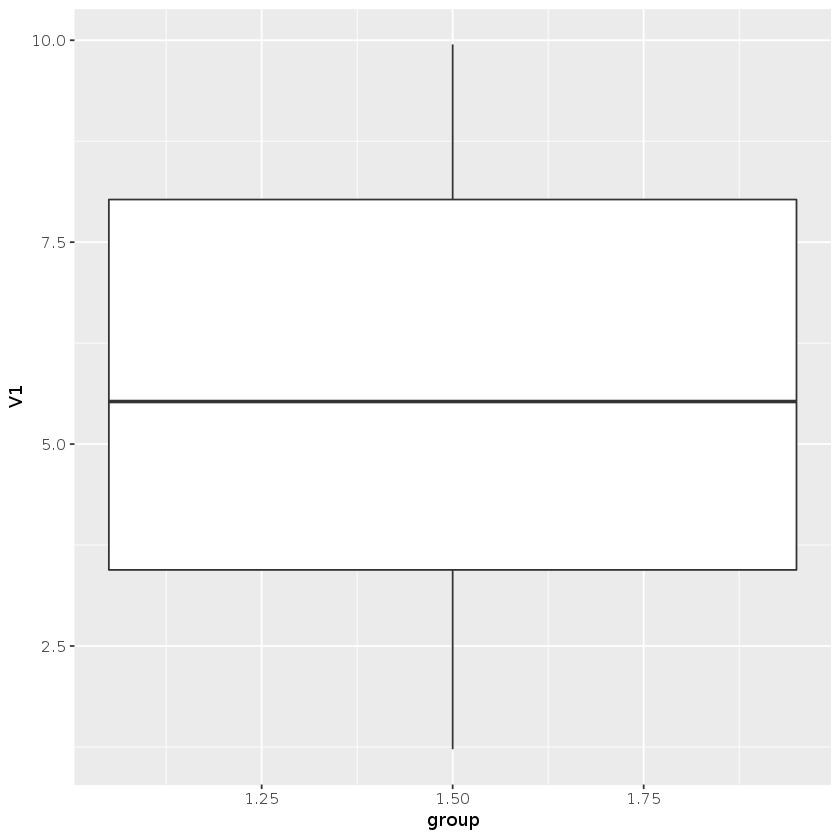

In [4]:
library(ggplot2)
ggplot(df1, aes(x=group, y=V1)) + 
  geom_boxplot()

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [5]:
reg1 <- lm(data=df1, response ~ V1 )
summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [6]:
require(gvlma)
gvmodel <- gvlma(reg1)
summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



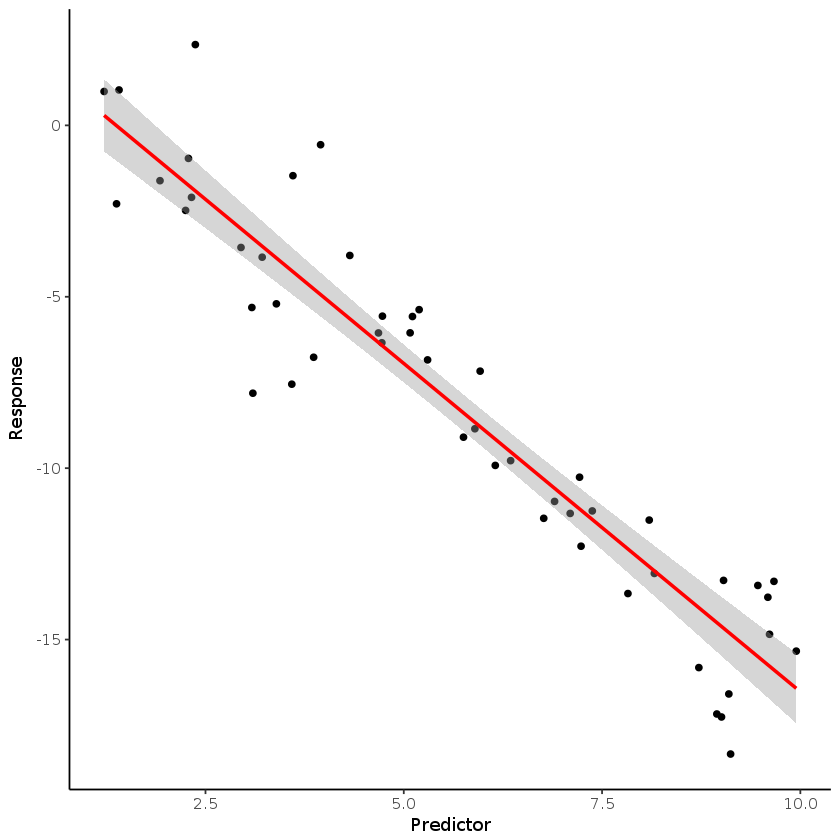

In [7]:
ggplot(df1, aes(x = V1, y = response)) + 
    geom_point() + 
        xlab("Predictor") + ylab("Response") + 
            geom_smooth(method = lm, se = TRUE, col = "red") + 
                theme_classic()

# Assigment 2

# Packages

In [8]:
library(thematicmaps)
library(tidyverse)

Loading required package: maptools
Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: digest
Loading required package: rgdal
rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.2, released 2016/10/24
 Path to GDAL shared files: /usr/share/gdal/2.1
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-4 
Loading required package: rgeos
rgeos version: 0.3-26, (SVN revision 560)
 GEOS runtime version: 3.5.1-CAPI-1.9.1 r4246 
 Linking to sp version: 1.2-4 
 Polygon checking: TRUE 

Loading required package: grid


## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [9]:
map_municipal <- read.csv2("nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

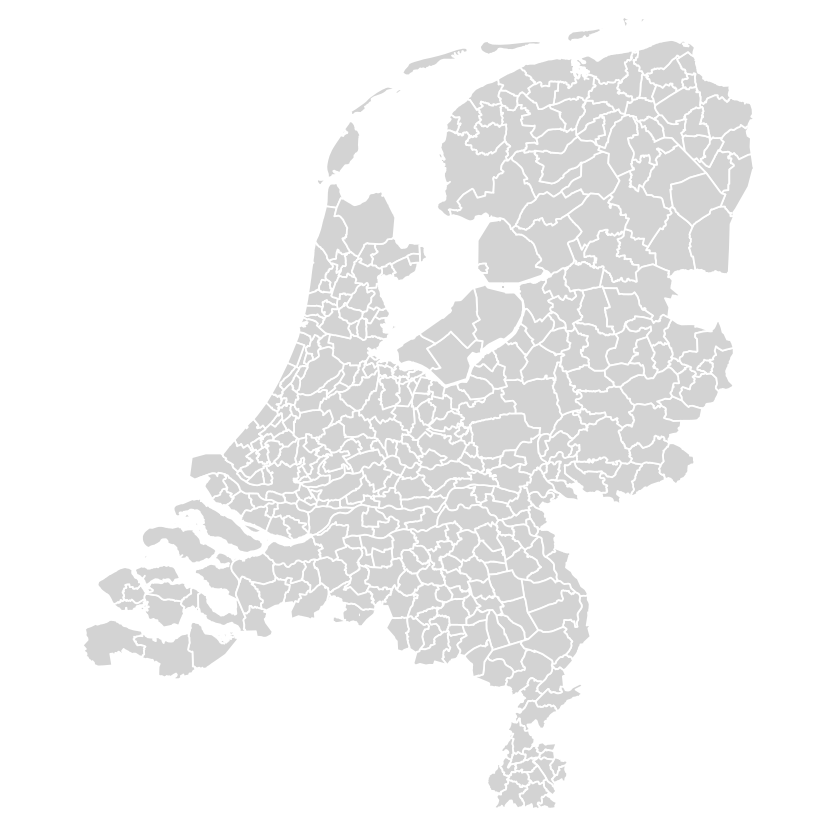

In [10]:
AddMapLayer(MapPlot(), map_municipal)


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [11]:
pc4_locations <- read.csv2("nld_pc4_locations.csv", stringsAsFactors = FALSE, dec = ".") %>%
    mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))

str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


## Assignment 2d

### 2di

Read in the school data


In [12]:
schools <- read.csv2("schools.csv", stringsAsFactors = FALSE, dec = ".")


str(schools)

'data.frame':	1603 obs. of  31 variables:
 $ PROVINCIE                                 : chr  "                    " "Drenthe" "Drenthe" "Drenthe" ...
 $ BEVOEGD.GEZAG.NUMMER                      : int  41152 10053 10053 13273 13273 13273 13273 13273 13273 13273 ...
 $ BRIN.NUMMER                               : chr  "23HC" "18BR" "18BR" "20LO" ...
 $ VESTIGINGSNUMMER                          : chr  "23HC04" "18BR00" "18BR01" "20LO00" ...
 $ VESTIGINGSNAAM                            : chr  "RSG Lingecollege" "School voor Praktijkonderwijs Assen" "School voor Praktijkonderwijs Assen" "Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo" ...
 $ STRAATNAAM                                : chr  "                        " "Zwartwatersweg" "Bosrand" "Mr Groen v Prinstererln" ...
 $ HUISNUMMER.TOEVOEGING                     : chr  "            " "202" "2" "98" ...
 $ POSTCODE                                  : chr  "       " "9406 NN" "9401 SL" "9402 KG" ...
 $ PLAATSNAA

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [16]:
schools1 <- data.frame(schools)
    PC4 <- substr(schools$POSTCODE, start = 1, stop = 4)
head(PC4)
head(schools1$DENOMINATIE)



[1] "    " "9406" "9401" "9402" "9331" "9411"

[1] "Openbaar" "Openbaar" "Openbaar" "Openbaar" "Openbaar" "Openbaar"

### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [14]:
school_loc <- cbind(PC4, schools1)
  new_school_loc  <- subset(school_loc, school_loc$DENOMINATIE ==  "Rooms-Katholiek" | school_loc$DENOMINATIE == "Protestants-Christelijk")
head(new_school_loc)

,PC4,PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
22,7824,Drenthe,35647,00PF,00PF00,Carmelcollege Emmen,Wendeling,59,7824 TB,EMMEN,...,5,Zuid- en Midden-Drenthe,8,Zuidoost-Drenthe,8,Zuidoost-Drenthe,4,Assen-Hoogeveen-Emmen,8,Zuid-Oost Drenthe
25,7902,Drenthe,41271,02VA,02VA00,Roelof van Echten College,Sportveldenweg,20,7902 NX,HOOGEVEEN,...,5,Zuid- en Midden-Drenthe,9,Zuidwest-Drenthe,9,Zuidwest-Drenthe,4,Assen-Hoogeveen-Emmen,9,Zuid-West Drenthe
26,7903,Drenthe,41271,02VA,02VA01,St. Roelof van Echten College voor Christelijk Voortgezet Onderwijs Hoogeveen,Voltastraat,27,7903 AA,HOOGEVEEN,...,5,Zuid- en Midden-Drenthe,9,Zuidwest-Drenthe,9,Zuidwest-Drenthe,4,Assen-Hoogeveen-Emmen,9,Zuid-West Drenthe
27,7822,Drenthe,41509,16VP,16VP00,Hondsrug College Christelijke SGM voor LYC HAVO MAVO VBO LWOO,Emmalaan,25,7822 JB,EMMEN,...,5,Zuid- en Midden-Drenthe,8,Zuidoost-Drenthe,8,Zuidoost-Drenthe,4,Assen-Hoogeveen-Emmen,8,Zuid-Oost Drenthe
46,9406,Drenthe,46594,02EB,02EB00,Christelijk Scholengemeenschap Vincent van Gogh Lyceum Havo Mavo Vbo Lwoo,Selma Lagerloflaan,3,9406 KB,ASSEN,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
47,9405,Drenthe,46594,02EB,02EB04,Christelijk Scholengemeenschap Vincent van Gogh Lyceum Havo Mavo Vbo Lwoo,Salland,4,9405 GM,ASSEN,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


ERROR while rich displaying an object: Error in eval(expr, envir, enclos): object 'X' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, envir, enclos)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. by_layer(function

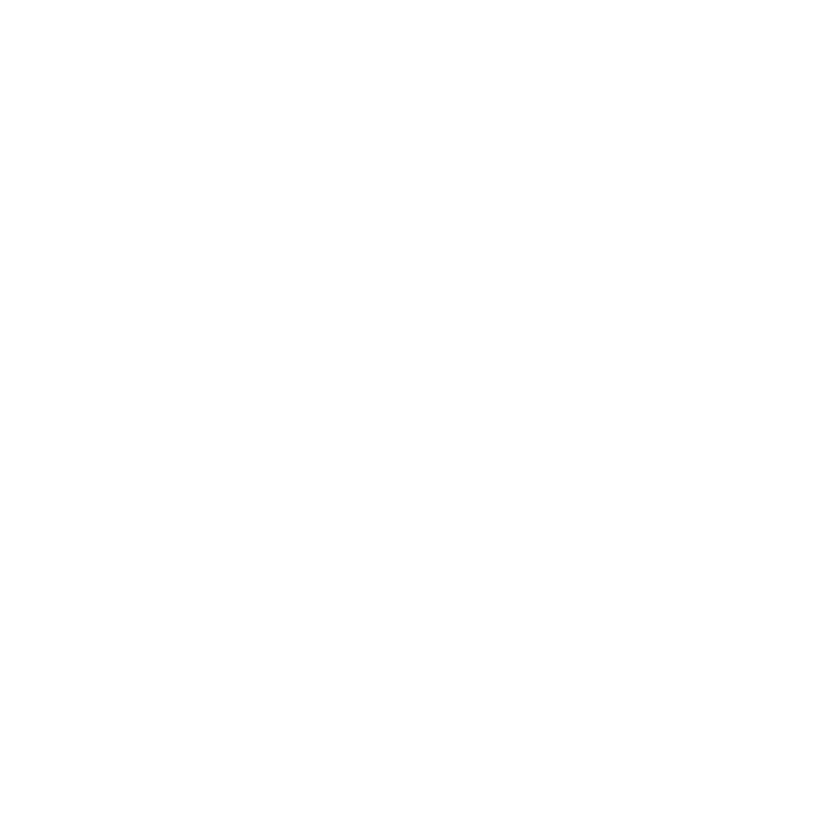

In [15]:
 AddMapLayer(MapPlot(), map_municipal) %>%
  AddPointsLayer(new_school_loc)

#i dont know why it doesnt work, and i have no more time to do.

End of notebook